In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load csv file
df = pd.read_csv("Fish.csv")
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# checking shape, missing values etc
df.Species.value_counts()
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

#### **Fit a predictive linear regression model to estimate weight of the fish from its length, height,and width**

1. First Divide dataset into test and train based on the feature and target.
2. Provided target variable is "Weight" and Feature variables as Length, Height and Width.
3. Feature scaling is required to bring the values is acceptable range using Z-transform.
4. It may also require Dimentionality reduction as dataset contains three length features.


In [4]:
#  First find the corelation matrix
correlation_matrix = df.corr()
correlation_matrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


**Correlation martix** shows strong positive correlation with each other. 
Mainly, target variable "Weight" has strong correlation with all other features.

<AxesSubplot:>

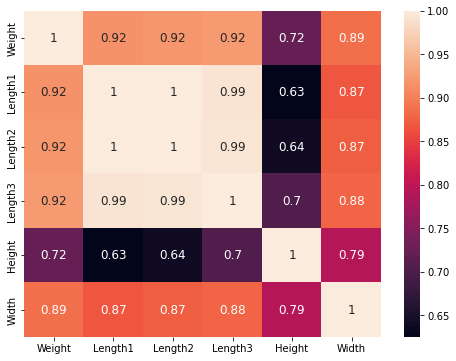

In [5]:
# Ploting the heat map
fig , ax = plt.subplots(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, annot_kws = {'size': 12})

### **Task 1: Linear regression**

In [6]:
# Importing libraries 
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn as sk

In [7]:
X= df.drop(columns=['Weight', 'Species'])
y = df['Weight']

In [8]:
# Split into train and test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Add a constant to the feature set for OLS regression
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

In [10]:
# Initialize and train models
ols_model = sm.OLS(y_train, X_train_ols).fit()

In [11]:
# Predict with the test data
y_pred_ols = ols_model.predict(X_test_ols)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"OLS Regression R^2 score: {r2_score(y_test, y_pred_ols):.4f}")
print(f"OLS Regression MSE: {mean_squared_error(y_test, y_pred_ols):.4f}\n")

OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872



In [13]:
ols_model.summary()                         

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           8.10e-55
Time:                        12:35:18   Log-Likelihood:                -787.66
No. Observations:                 127   AIC:                             1587.
Df Residuals:                     121   BIC:                             1604.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -515.3057     34.226    -15.056      0.000    -583.065    -447.546
Length1       43.5353     47.315      0.920      0.359     -50.137     137.208
Length2        7.8218     48.891      0.160      0.873     -88.970     104.614
Length3      -25.2567     18.146     -1.392      0.167     -61.181      10.667
Height        23.2289      9.384      2.475      0.015       4.652      41.806
Width         27.0665     21.800      1.242      0.217     -16.093      70.226
==============================================================================
Omnibus:                       20.933   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.028
Skew:                           0.844   Prob(JB):                     3.02e-07
Kurtosis:                       4.680   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print("\nOLS Regression Coefficients:\n", ols_model.params)


OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64


### **Report the coefficients values by using the standard Least Square Estimates**

**From the above summary of OLS regression model, the coefficients are as follows:**

- Constant ($\beta_0$​) = -515.3057
- Length1 ($\beta_1$​) = 43.5353
- Length2 ($\beta_2$​) = 7.8218
- Length3 ($\beta_3$​) = -25.2567

---

### What is the standard error of the estimated coefficients and R-squared term?

**Standard Errors are as follows:**

- Constant: 34.226  
- Length1: 47.315  
- Length2: 48.891  
- Length3: 18.146  

**R-squared term:** 0.884

---

### R-squared and MSE of OLS using sklearn:

- R-squared term =  0.8821
- MSE term =  16763.8872


In [15]:
# First perform feature scaling 
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [16]:
# Since column contains many length column, perform PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


linear_regressor = LinearRegression().fit(X_train_scaled, y_train)
y_pred_linear = linear_regressor.predict(X_test_scaled)

# for idx, y in enumerate(y_test):
#     print(f" Real : {y}, Predicted : {predict_linear[idx]}")

# Find the R^2 and MSE
r_square_linear =r2_score(y_test, y_pred_linear) 
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f" R^2 score: {r_square_linear:.4f},  MSE value: {mse_linear:.4f} ")


 R^2 score: 0.8821,  MSE value: 16763.8872 


In [17]:
# Performing Principle Component Analysis(PCA)
from sklearn.decomposition import PCA
pca = PCA(3)     # 3 refers to 3 components or feature
X_pca = pca.fit_transform(X)
X_pca.shape

(159, 3)

In [18]:
#  Again train model using linear regression but this time use X_pca

# Split into train and test
X_pca_train, X_pca_test, y_train, y_test =  train_test_split(X_pca, y, test_size=0.2, random_state=42)

# First perform feature scaling 
scalar = StandardScaler()
X_pca_train_scaled = scalar.fit_transform(X_pca_train)
X_pca_test_scaled = scalar.transform(X_pca_test)

linear_regressor = LinearRegression().fit(X_pca_train_scaled, y_train)
y_predict_linear = linear_regressor.predict(X_pca_test_scaled)

# for idx, y in enumerate(y_test):
#     print(f" Real : {y}, Predicted : {predict_linear[idx]}")

# Find the R^2 and MSE
r_square_linear =r2_score(y_test, y_predict_linear) 
mse_linear = mean_squared_error(y_test, y_predict_linear)
# r_square_linear, mse_linear
print(f" R^2 score after PCA: {r_square_linear:.4f},  MSE value after PCA: {mse_linear:.4f} ")

 R^2 score after PCA: 0.8781,  MSE value after PCA: 17343.8112 


### **Task 2: Ridge and Lasso Regression**

In [19]:
from sklearn.linear_model import RidgeCV, LassoCV
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], max_iter= 50000).fit(X_train_scaled, y_train)

In [20]:
# Predict with the test data
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print R^2 score and MSE for each model

models = ['Ridge', 'Lasso']
predictions = [y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

Ridge Regression R^2 score: 0.8770
Ridge Regression MSE: 17488.5753

Lasso Regression R^2 score: 0.8773
Lasso Regression MSE: 17458.6532



In [22]:
# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_regressor.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)


OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [328.72727521 -36.03906623  41.08583983]

Ridge Regression Coefficients:
 [83.29023683 80.60503657 64.91737168 35.7986499  77.01514167]

Lasso Regression Coefficients:
 [229.96344143   0.           0.          44.01533366  75.78051359]


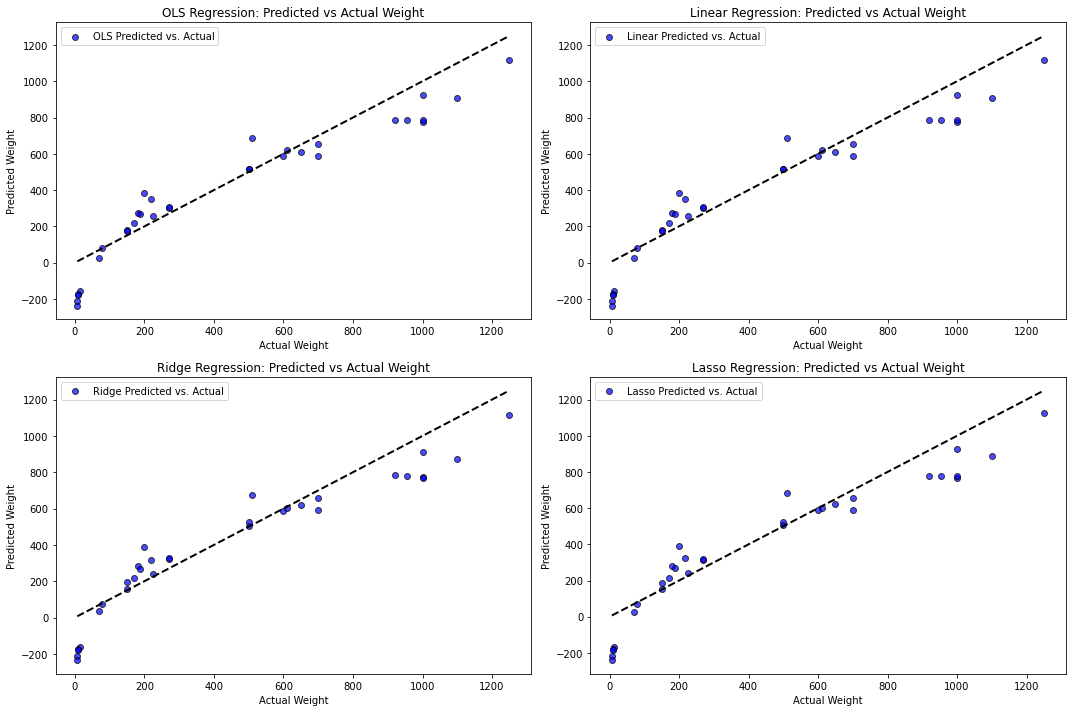

In [23]:
# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Weight')
    axs[i].set_ylabel('Predicted Weight')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Weight')
    axs[i].legend()

plt.tight_layout()
plt.show()